<a href="https://colab.research.google.com/github/talhaanwarch/Epilepsy_classification/blob/master/Epilepsy_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://zenodo.org/record/1252141

In [2]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/talhaanwarch/entropy.git


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-lqt_ls4u
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-lqt_ls4u
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=628ee3a2f7774a22717afcd047853745eb144f30ce995668dbde427fa2cea0d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ngryrysk/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/talhaanwarch/entropy.git to /tmp/pip-req-build-0a79ofyw
  Running command git clone -q https://github.com/talhaanwarch/entropy.git /tmp/pip-req-build-0a79ofyw
  Created wheel for entropy: filename=entropy-0.1.1-cp36-none-any.whl size=15448 sha256=6c111c827080118972f8d6fdc2463941f6a446c397ce224c960fc680cc48cad5
  Stored in directory: /tmp/pip-ephem-wheel-cache-kgc9i9i0/wheels/79/43/63/3fa9c8c5f03fe3a78d71c1aeedca9577f2f32fb2156ff9ecf8
Successfully built entropy


In [3]:
!wget https://zenodo.org/record/1252141/files/EEGs_Nigeria.zip

--2020-12-24 02:00:47--  https://zenodo.org/record/1252141/files/EEGs_Nigeria.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276402063 (264M) [application/octet-stream]
Saving to: ‘EEGs_Nigeria.zip’

EEGs_Nigeria.zip    100%[===================>] 263.60M  16.6MB/s    in 13s     

2020-12-24 02:01:02 (19.5 MB/s) - ‘EEGs_Nigeria.zip’ saved [276402063/276402063]



In [4]:
from zipfile import ZipFile 
data = ZipFile('EEGs_Nigeria.zip')
data.extractall()

In [5]:
import pandas as pd

In [6]:
meta=pd.read_csv('https://zenodo.org/record/1252141/files/metadata_nigeria.csv')

In [7]:
meta.head()

,subject.id,recordedPeriod,startTime,session.id,first_condition,remarks,Group,csv.file
0,6,270,26/9/2016 13:13,1,open,NaN,control,signal-6-1.csv.gz
1,9,271,26/9/2016 13:30,1,closed,NaN,control,signal-9-1.csv.gz
2,10,272,26/9/2016 13:36,1,open,eyes closed at 2:40,control,signal-10-1.csv.gz
3,11,274,26/9/2016 13:42,2,closed,no.11.1 failed >> 11.2 is the right one,control,signal-11-2.csv.gz
4,11,1,26/9/2016 13:42,1,closed,no.11.1 failed >> 11.2 is the right one,control,signal-11-1.csv.gz


In [8]:
EP_sub=meta['csv.file'][meta['Group']=='epilepsy']
CT_sub=meta['csv.file'][meta['Group']=='control']

In [9]:
CT_sub

0        signal-6-1.csv.gz
1        signal-9-1.csv.gz
2       signal-10-1.csv.gz
3       signal-11-2.csv.gz
4       signal-11-1.csv.gz
              ...         
161    signal-573-1.csv.gz
162    signal-574-1.csv.gz
163    signal-575-1.csv.gz
164    signal-576-1.csv.gz
165    signal-577-1.csv.gz
Name: csv.file, Length: 97, dtype: object

In [10]:
Epilepsy=[]
for i in EP_sub:
  Epilepsy.append(pd.read_csv('EEGs_Nigeria/{}'.format(i), compression='gzip')) 

In [11]:
Control=[]
for i in CT_sub:
  try:
    Control.append(pd.read_csv('EEGs_Nigeria/{}'.format(i), compression='gzip')) 
  except:
      pass

In [12]:
Epilepsy[0].head()

,Unnamed: 0,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,COUNTER,INTERPOLATED,GYROX,GYROY,RAW_CQ,CQ_CMS,CQ_F7,CQ_T7,CQ_O2,CQ_FC6,CQ_AF4,CQ_F3,CQ_P7,CQ_P8,CQ_F4,CQ_AF3,CQ_FC5,CQ_O1,CQ_T8,CQ_F8,CQ_DRL
0,1,4036,330.221053,4134,-213.473684,155.242105,3712,322.421053,3935,4169,67.547368,-74.505263,4170,3815,76.894737,46,0,1555,1771,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,2,4053,341.505263,4138,-211.936842,160.368421,3715,321.905263,3944,4173,80.368421,-65.778947,4173,3816,82.536842,47,0,1551,1771,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,3,4053,-344.757895,4137,-212.957895,156.778947,3713,322.421053,3939,4174,77.294737,-64.757895,4173,3816,82.021053,48,0,1555,1771,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,4,4044,343.557895,4136,-212.452632,147.042105,3713,323.452632,3930,4170,64.989474,-65.778947,4170,3813,75.863158,49,0,1555,1771,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,5,4049,-344.242105,4131,-213.989474,141.400000,3712,319.347368,3927,4170,62.421053,-62.189474,4166,3811,73.305263,50,0,1555,1771,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [13]:
channels=Epilepsy[0].columns[1:15].tolist()


In [14]:
from scipy import signal
nyq = 0.5 * 128
l=0.3
low = l / nyq
high = 30 / nyq
b, a = signal.butter(3, [low,high], 'band')

In [15]:
EP_data=[]
for EP in Epilepsy:
  data=EP.iloc[:,1:15].values
  EP_data.append(signal.filtfilt(b, a, data.T).T)


In [16]:
CT_data=[]
for CT in Control:
  data=CT.iloc[:,1:15].values
  CT_data.append(signal.filtfilt(b, a, data.T).T)


In [17]:
import numpy as np
X1=np.concatenate(CT_data)
X2=np.concatenate(EP_data)
X=np.concatenate((X1,X2))
X.shape

(7342592, 14)

In [18]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X)


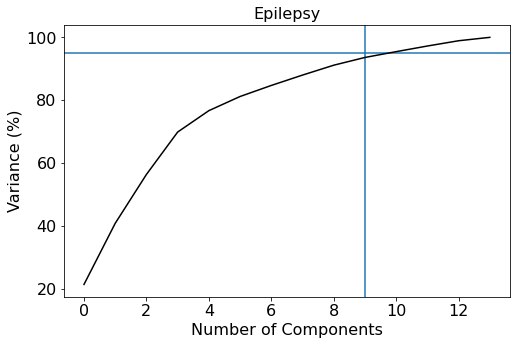

In [19]:
plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 16})

plt.axhline(95)
plt.axvline(9)
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_*100)[0:15],color='k')
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Variance (%)',fontsize=16) #for each component
plt.title('Epilepsy',fontsize=16)
plt.show()

In [20]:
df1 = pd.DataFrame.from_records(X)
df1.columns=channels
df1.shape

(7342592, 14)

In [21]:
ch=10
X_1=df1.var()
idx=X_1.sort_values()[-ch::].index

print(idx)
ch=len(idx)

Index(['O2', 'F7', 'AF3', 'FC6', 'T8', 'P8', 'F8', 'FC5', 'F4', 'AF4'], dtype='object')


In [22]:

indx=[]
for i in idx:
  indx.append(channels.index(i))
indx=np.array(indx)

In [23]:
def reshape(data):   
    shape=data.ravel().shape[0]
    s=shape%(14*1000)
    if s!=0:
        d=data.ravel()[s//2:-s//2].reshape(-1,1000,14)[:,:,indx]
        #return np.swapaxes(d,1,2)   
        return d
    else: 
        d1=data.reshape(-1,1000,14)[:,:,indx]
        #return np.swapaxes(d1,1,2)   
        return d1

In [24]:

EP_reshaped=[]
for i in EP_data:
    EP_reshaped.append(reshape(i))
    
    
CT_reshaped=[]
for i in CT_data:
    CT_reshaped.append(reshape(i))

In [25]:
EP_reshaped[0].shape

(34, 1000, 10)

In [26]:
from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)

def argminim(data):
      return np.argmin(data,axis=0)


def argmaxim(data):
      return np.argmax(data,axis=0)

def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


def lziv_complex(data):
    result=[]
    for i in data.T:
        result.append(lziv_complexity(i))
    return np.array(result)

        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),teager(data),lziv_complex(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)


In [27]:
features1=[]
for f in CT_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))
    

In [28]:

features2=[]
for f in EP_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [29]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)
y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))


In [30]:
X.shape,y.shape

((221, 260), (221,))

#import libraries

In [31]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
#from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
#import nolds
np.warnings.filterwarnings('ignore')

# Classification

In [32]:
#%% split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

In [33]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:

clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68        28
         1.0       0.76      0.82      0.79        39

    accuracy                           0.75        67
   macro avg       0.74      0.73      0.73        67
weighted avg       0.74      0.75      0.74        67

accuracy is  0.746268656716418


# Feature

In [35]:
feature_list=['mean','std','ptp','var','minim','maxim','argmin','argmax','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','teager','lziv_complex',
'hjorth_mobility','hjorth_complexity']

In [36]:
feature=X.copy()
label=y.copy()
from sklearn.preprocessing import scale,maxabs_scale
feature=scale(feature)

In [37]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    return grid_search.best_score_


svc_param_selection(feature,label)


{'C': 120, 'gamma': 0.0005}


0.792292490118577

In [38]:
clf = SVC(kernel="rbf", C=10,gamma=0.008, probability=True)
acc = cross_val_score(clf,feature,label,cv=10)
precision = cross_val_score(clf,feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.7152173913043478 0.11228862234964647
average precision :  0.7228820117790705 0.10143914729401787
average recall :  0.8365384615384615 0.1052239245287313
average f1 score :  0.7725897856932339 0.09274287596059141


In [39]:

def knn_param_selection(X, y, nfolds):
    n_neighbors  = [ 3,4,5,6,7,8,9]
    weights  = ['uniform','distance']
    metric=['minkowski','manhattan','euclidean']
    param_grid = {'n_neighbors': n_neighbors, 'weights' : weights,'metric':metric}
    grid_search =GridSearchCV( KNeighborsClassifier(), param_grid, cv=nfolds,n_jobs=-1)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


knn_param_selection(feature,label,10)

0.7067193675889327


{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}

In [40]:
clf = KNeighborsClassifier(metric= 'minkowski', n_neighbors=3, weights= 'uniform')
acc = cross_val_score(clf,feature,label,cv=10)
precision = cross_val_score(clf,feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.6885375494071145 0.12463510458135595
average precision :  0.7224475524475524 0.11517223116248672
average recall :  0.7730769230769232 0.16538461538461538
average f1 score :  0.7371033219653909 0.11323055040959522


In [41]:

from sklearn.linear_model import LogisticRegression
def logistic_param_selection(X, y, nfolds):
    C= [0.001,0.05,0.1, 1,2,3,4,5,8, 10,12,15]
    max_it= [200,300,400,500]
    param_grid = {'C': C,'max_iter':max_it}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


logistic_param_selection(feature,label,10)

0.7519762845849802


{'C': 2, 'max_iter': 200}

In [42]:

clf = LogisticRegression(max_iter=200,C=0.1)
acc = cross_val_score(clf,feature,label,cv=10)
precision = cross_val_score(clf,feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.7337944664031621 0.14338363477701085
average precision :  0.7631113331113332 0.11729428831591283
average recall :  0.7801282051282051 0.15884118698387317
average f1 score :  0.7677342287342287 0.12917942609299382


In [43]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
def dtree_param_selection(X,y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'max_depth': np.arange(2, 20),'random_state':[10,20,30,40]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
    #fit model to data
    dtree_gscv.fit(X, y)
    print(dtree_gscv.best_score_)
    #print(dtree_gscv.best_estimator_)
    return dtree_gscv.best_params_

dtree_param_selection(feature,label)

0.6794466403162056


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'random_state': 40}

In [44]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, max_features= 'log2',random_state=10)
acc = cross_val_score(clf,feature,label,cv=10)
precision = cross_val_score(clf,feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.575296442687747 0.12248963391129385
average precision :  0.6280884148531208 0.09853135900498268
average recall :  0.6480769230769232 0.2442374990660379
average f1 score :  0.6154322316443972 0.15782321129978247


In [45]:
feature_selected=[]
feat_non_sorted=[]
score_non_sorted=[]
for i ,j in zip(range(0,feature.shape[1],ch),feature_list):
  acc=svc_param_selection(feature[:,i:i+ch],label)
  print(j," : ",acc)
  feat_non_sorted.append(j)
  score_non_sorted.append(acc)

{'C': 40, 'gamma': 0.01}
mean  :  0.592687747035573
{'C': 120, 'gamma': 0.01}
std  :  0.6391304347826087
{'C': 40, 'gamma': 0.005}
ptp  :  0.6575098814229249
{'C': 120, 'gamma': 0.01}
var  :  0.5978260869565217
{'C': 50, 'gamma': 0.005}
minim  :  0.6575098814229249
{'C': 20, 'gamma': 0.01}
maxim  :  0.6252964426877471
{'C': 70, 'gamma': 0.0005}
argmin  :  0.592885375494071
{'C': 40, 'gamma': 0.01}
argmax  :  0.5881422924901185
{'C': 120, 'gamma': 0.01}
mean_square  :  0.5978260869565217
{'C': 20, 'gamma': 0.005}
rms  :  0.6393280632411067
{'C': 50, 'gamma': 0.008}
abs_diffs_signal  :  0.7294466403162055
{'C': 20, 'gamma': 0.1}
skewness  :  0.633201581027668
{'C': 20, 'gamma': 0.005}
kurtosis  :  0.6015810276679843
{'C': 50, 'gamma': 0.01}
zero_crossing  :  0.6788537549407114
{'C': 20, 'gamma': 0.01}
app_epy  :  0.7247035573122529
{'C': 70, 'gamma': 0.001}
perm_epy  :  0.6924901185770752
{'C': 10, 'gamma': 0.01}
svd_epy  :  0.6841897233201581
{'C': 100, 'gamma': 0.01}
spectral_epy  :  0

In [46]:
score,feat  = zip(*sorted(zip(score_non_sorted, feat_non_sorted),reverse=True))


In [47]:
acc=0
deleted_item=[]
for i in range(1,20):
  feature_selected=list(feat[:i])
  # feature_selected=del_item(feature_selected,deleted_item)

  X_good=[]
  for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
      for fe in feature_selected:
          if key==fe:     
              #print('key',key,'value',val,":",val+ch) 
              X_good.append(feature[:,val:val+ch])
  good_feature=np.concatenate((X_good),axis=1)
  #good_feature=np.concatenate((good_feature,non_eeg),1)


  acc_new=svc_param_selection(good_feature,label)
  print(i,' : ', acc_new)


{'C': 70, 'gamma': 0.0005}
1  :  0.7294466403162055
{'C': 25, 'gamma': 0.001}
2  :  0.7786561264822134
{'C': 120, 'gamma': 0.001}
3  :  0.7792490118577075
{'C': 120, 'gamma': 0.001}
4  :  0.792490118577075
{'C': 120, 'gamma': 0.0005}
5  :  0.7794466403162055
{'C': 60, 'gamma': 0.0005}
6  :  0.7697628458498024
{'C': 30, 'gamma': 0.001}
7  :  0.8148221343873517
{'C': 30, 'gamma': 0.001}
8  :  0.8148221343873517
{'C': 25, 'gamma': 0.001}
9  :  0.8150197628458498
{'C': 20, 'gamma': 0.001}
10  :  0.8106719367588932
{'C': 25, 'gamma': 0.001}
11  :  0.8104743083003954
{'C': 40, 'gamma': 0.0005}
12  :  0.8195652173913043
{'C': 100, 'gamma': 0.0001}
13  :  0.8110671936758894
{'C': 120, 'gamma': 0.0001}
14  :  0.8112648221343874
{'C': 120, 'gamma': 0.0001}
15  :  0.8110671936758894
{'C': 120, 'gamma': 0.0001}
16  :  0.8067193675889328
{'C': 120, 'gamma': 0.0001}
17  :  0.8067193675889328
{'C': 100, 'gamma': 0.0001}
18  :  0.7976284584980238
{'C': 20, 'gamma': 0.0005}
19  :  0.7976284584980238


In [48]:
feature_selected=feat[:9]
X_good=[]
for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
    for fe in feature_selected:
        if key==fe:     
            print('key',key,'value',val,":",val+ch) 
            X_good.append(feature[:,val:val+ch])

key abs_diffs_signal value 100 : 110
key app_epy value 140 : 150
key perm_epy value 150 : 160
key spectral_epy value 170 : 180
key sample_epy value 180 : 190
key katz value 190 : 200
key petrosian value 210 : 220
key lziv_complex value 230 : 240
key hjorth_mobility value 240 : 250


In [100]:
good_feature=np.concatenate((X_good),axis=1)
good_feature.shape

(221, 128)

In [50]:
svc_param_selection(good_feature,label)


{'C': 25, 'gamma': 0.001}


0.8150197628458498

In [51]:
clf = SVC(kernel="rbf", C=25,gamma=0.001, probability=True)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.8150197628458498 0.07769689391455793
average precision :  0.8255611790170614 0.08442112955859137
average recall :  0.8756410256410257 0.10479151839445869
average f1 score :  0.8447779104675657 0.06774072229227102


In [52]:
knn_param_selection(good_feature,label,10)

0.6796442687747036


{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}

In [53]:
clf = KNeighborsClassifier(metric= 'minkowski', n_neighbors=6, weights= 'uniform')
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.6796442687747036 0.10759576463862368
average precision :  0.7429453879453879 0.1201280708184419
average recall :  0.6955128205128205 0.11578456325761823
average f1 score :  0.7140914737436476 0.10233508332692709


In [54]:
logistic_param_selection(good_feature,label,10)

0.7968379446640317


{'C': 1, 'max_iter': 200}

In [55]:

clf = LogisticRegression(max_iter=200,C=1)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.7968379446640317 0.08750634653357357
average precision :  0.8220908258408258 0.07852001608073533
average recall :  0.8358974358974359 0.1423942910452802
average f1 score :  0.8218586726172934 0.08405802590977393


In [56]:
dtree_param_selection(good_feature,label)

0.715612648221344


{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 10}

In [57]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 'log2',random_state=10)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.715612648221344 0.10270388010083821
average precision :  0.7088569518716578 0.07775310556214832
average recall :  0.8583333333333334 0.13833238278231436
average f1 score :  0.7729668607254815 0.09631017138505021


In [106]:
from sklearn.ensemble import StackingClassifier,VotingClassifier 

estimators = [
    ('SVM', SVC(kernel="rbf", C=25,gamma=0.001, probability=True)),
    ('KNN',KNeighborsClassifier(metric= 'minkowski', n_neighbors=6, weights= 'uniform')),
    ('LR',  LogisticRegression(max_iter=200,C=1)),
    ('DT',DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 'log2',random_state=10)),
     ]

#clf = StackingClassifier(estimators=estimators, final_estimator=SVC())
clf=VotingClassifier(estimators,voting='hard',n_jobs=-1,weights=np.array([82,67,80,72])/np.sum([82,67,80,72]))

In [107]:
np.array([82,67,80,72])/np.sum([82,67,80,72])

array([0.27242525, 0.22259136, 0.26578073, 0.23920266])

In [108]:
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.6110671936758895 0.11440895638811206
average precision :  0.6205601343101342 0.08738990950572686
average recall :  0.8724358974358974 0.12123521890831697
average f1 score :  0.721503681339054 0.08528258543872451


#Feature Selection

#feature

In [58]:
feature_list=['mean','std','ptp','var','minim','maxim','argmin','argmax','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','teager','lziv_complex',
'hjorth_mobility','hjorth_complexity']

In [59]:
feature=X.copy()
label=y.copy()
from sklearn.preprocessing import scale,maxabs_scale
feature=scale(feature)

In [60]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_


svc_param_selection(feature,label)


0.792292490118577

In [61]:
feature_selected=[]
feat_non_sorted=[]
score_non_sorted=[]
for i ,j in zip(range(0,feature.shape[1],ch),feature_list):
  acc=svc_param_selection(feature[:,i:i+ch],label)
  print(j," : ",acc)
  feat_non_sorted.append(j)
  score_non_sorted.append(acc)

mean  :  0.592687747035573
std  :  0.6391304347826087
ptp  :  0.6575098814229249
var  :  0.5978260869565217
minim  :  0.6575098814229249
maxim  :  0.6252964426877471
argmin  :  0.592885375494071
argmax  :  0.5881422924901185
mean_square  :  0.5978260869565217
rms  :  0.6393280632411067
abs_diffs_signal  :  0.7294466403162055
skewness  :  0.633201581027668
kurtosis  :  0.6015810276679843
zero_crossing  :  0.6788537549407114
app_epy  :  0.7247035573122529
perm_epy  :  0.6924901185770752
svd_epy  :  0.6841897233201581
spectral_epy  :  0.6972332015810276
sample_epy  :  0.715810276679842
katz  :  0.6887351778656127
higuchi  :  0.6614624505928854
petrosian  :  0.7061264822134388
teager  :  0.5881422924901185
lziv_complex  :  0.7294466403162055
hjorth_mobility  :  0.6978260869565217
hjorth_complexity  :  0.6749011857707511


In [62]:
score,feat  = zip(*sorted(zip(score_non_sorted, feat_non_sorted),reverse=True))


In [63]:
acc=0
deleted_item=[]
for i in range(1,20):
  feature_selected=list(feat[:i])
  # feature_selected=del_item(feature_selected,deleted_item)

  X_good=[]
  for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
      for fe in feature_selected:
          if key==fe:     
              #print('key',key,'value',val,":",val+ch) 
              X_good.append(feature[:,val:val+ch])
  good_feature=np.concatenate((X_good),axis=1)
  #good_feature=np.concatenate((good_feature,non_eeg),1)


  acc_new=svc_param_selection(good_feature,label)
  print(i,' : ', acc_new)


1  :  0.7294466403162055
2  :  0.7786561264822134
3  :  0.7792490118577075
4  :  0.792490118577075
5  :  0.7794466403162055
6  :  0.7697628458498024
7  :  0.8148221343873517
8  :  0.8148221343873517
9  :  0.8150197628458498
10  :  0.8106719367588932
11  :  0.8104743083003954
12  :  0.8195652173913043
13  :  0.8110671936758894
14  :  0.8112648221343874
15  :  0.8110671936758894
16  :  0.8067193675889328
17  :  0.8067193675889328
18  :  0.7976284584980238
19  :  0.7976284584980238


#Feature Selection

In [64]:
feature_list=['mean','std','ptp','var','minim','maxim','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','hjorth_mobility','hjorth_complexity']

In [65]:

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    LogisticRegression()]

In [66]:
X_all=X.copy()
y_all=y.copy()
clf_feature_selected=[]
for clf in classifiers:
    feature_selected=[]
    for i in range(50):
        randomize = np.arange(len(X_all))
        np.random.shuffle(randomize)
        X_all = X_all[randomize]
        y_all = y_all[randomize]
        for i,j in zip(range(0,X_all.shape[1],ch),feature_list):
            X_new=X_all[:,i:i+ch]
            y_new=y_all.copy()
            X_train, X_test, y_train, y_test = train_test_split(X_new, y_all,test_size=0.2, random_state=42,stratify=y_all)
            sc=StandardScaler()
            X_train=sc.fit_transform(X_train)
            X_test=sc.transform(X_test)

            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)  
            acc=metrics.accuracy_score(y_test, y_pred)
      #print("Accuracy of ",j,metrics.accuracy_score(y_test, y_pred))
            if acc>0.75:
                feature_selected.append(j)
    clf_feature_selected.append(feature_selected)        
 # print('-------------------------------------------------------------------')

In [67]:

clf_list=['KNN','SVM','DT','LR']
from collections import Counter
clf_count=[]
for i,j in zip(range(4),clf_list):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
    #print(c.most_common())
    #clf_count.append(c.most_common(10))
    print('==================================================================================================')
    print(j,c.most_common(10))

KNN [('kurtosis', 10), ('katz', 8), ('higuchi', 8), ('sample_epy', 8), ('svd_epy', 7), ('hjorth_complexity', 2), ('spectral_epy', 1), ('mean', 1), ('var', 1), ('abs_diffs_signal', 1)]
SVM [('spectral_epy', 23), ('hjorth_complexity', 22), ('higuchi', 19), ('svd_epy', 16), ('minim', 15), ('sample_epy', 15), ('std', 13), ('skewness', 13), ('kurtosis', 13), ('ptp', 9)]
DT [('svd_epy', 6), ('higuchi', 4), ('kurtosis', 2), ('petrosian', 2), ('minim', 1), ('std', 1), ('ptp', 1), ('spectral_epy', 1), ('sample_epy', 1)]
LR [('hjorth_complexity', 32), ('spectral_epy', 27), ('svd_epy', 22), ('higuchi', 14), ('minim', 12), ('std', 10), ('skewness', 10), ('kurtosis', 9), ('petrosian', 8), ('hjorth_mobility', 8)]


In [68]:

from collections import Counter
clf_feature=[]
for i in range(4):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
    c={k: v / total for total in (sum(c.values(), 0.0),) for k, v in c.items()}

    for k,v in c.items():
        if v>.1:
            clf_feature.append(k)

In [69]:

count= {x:clf_feature.count(x) for x in clf_feature}
c = Counter(count)
print(c.most_common())
good_feature=[]
for i in range(len(c.keys())):
      good_feature.append(c.most_common()[i][0])
print('===============================================================================================================')
print(good_feature)

[('svd_epy', 3), ('higuchi', 3), ('kurtosis', 2), ('spectral_epy', 2), ('hjorth_complexity', 2), ('katz', 1), ('sample_epy', 1), ('petrosian', 1)]
['svd_epy', 'higuchi', 'kurtosis', 'spectral_epy', 'hjorth_complexity', 'katz', 'sample_epy', 'petrosian']


In [70]:

X_good=[]
for key,val in zip(feature_list,range(0,X.shape[1],ch)):
    for fe in good_feature:
        if key==fe:     
            print('key',key,'value',val,":",val+ch) 
            X_good.append(X[:,val:val+16])

key kurtosis value 100 : 110
key svd_epy value 140 : 150
key spectral_epy value 150 : 160
key sample_epy value 160 : 170
key katz value 170 : 180
key higuchi value 180 : 190
key petrosian value 190 : 200
key hjorth_complexity value 210 : 220


In [71]:

X=np.concatenate((X_good),axis=1)


# Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7423232323232323


{'classifier__C': 100, 'classifier__gamma': 0.001}

### NuSVM

In [73]:
from sklearn.svm import SVC, LinearSVC, NuSVC

clf = NuSVC(kernel="rbf")
nu = [0.1,0.3,0.5,0.7]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__nu=nu,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7377777777777778


{'classifier__gamma': 0.001, 'classifier__nu': 0.3}

### LR

In [74]:
clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7018181818181819


{'classifier__C': 7, 'classifier__penalty': 'l2'}

### KNN

In [75]:

clf = KNeighborsClassifier()

n_neighbors  = [ 3,4,5,6,7,8,9,11,13]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 
results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.6967676767676767


{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 11,
 'classifier__weights': 'distance'}

# Cross Validation

In [76]:
classifiers = [
    KNeighborsClassifier(n_neighbors=8,weights='distance',metric='manhattan'),
    SVC(kernel="rbf",C=70,gamma=0.001),
    NuSVC(nu=0.3,gamma=0.001),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(C=3,penalty='l2')]

In [77]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', sc),('estimator', clf)])


In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 62.4848%
SVC
****Results****
Accuracy: 72.8586%
NuSVC
****Results****
Accuracy: 73.7778%
DecisionTreeClassifier
****Results****
Accuracy: 60.1919%
RandomForestClassifier
****Results****
Accuracy: 64.2525%
AdaBoostClassifier
****Results****
Accuracy: 67.8788%
GradientBoostingClassifier
****Results****
Accuracy: 66.9798%
GaussianNB
****Results****
Accuracy: 55.6061%
LinearDiscriminantAnalysis
****Results****
Accuracy: 66.9899%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 57.9192%
LogisticRegression
****Results****
Accuracy: 70.1717%


Text(0.5, 1.0, 'Classifiers')

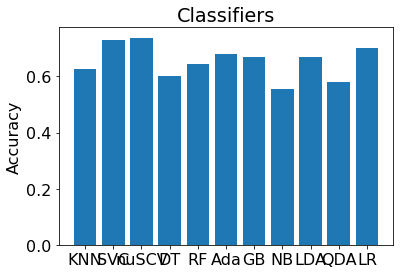

In [79]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

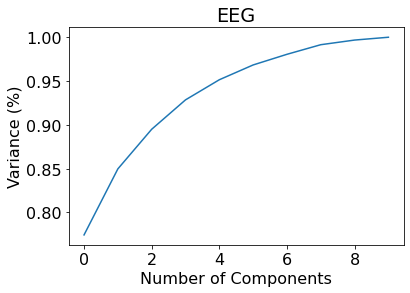

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [81]:
clf = SVC(kernel='rbf')
pca = PCA(n_components=5)

#pipeline = Pipeline([('selector',pca), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',pca), ('estimator', clf)])


In [82]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 54.7172%
SVC
****Results****
Accuracy: 57.4646%
NuSVC
****Results****
Accuracy: 57.4545%
DecisionTreeClassifier
****Results****
Accuracy: 59.6970%
RandomForestClassifier
****Results****
Accuracy: 60.1717%
AdaBoostClassifier
****Results****
Accuracy: 52.5253%
GradientBoostingClassifier
****Results****
Accuracy: 59.7273%
GaussianNB
****Results****
Accuracy: 53.3939%
LinearDiscriminantAnalysis
****Results****
Accuracy: 56.1414%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 56.5253%
LogisticRegression
****Results****
Accuracy: 58.4141%


In [83]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel="rbf")
n_components = [5,10,15,20]
Cs = [0.001,0.1, 1,2,3,5,7,10,15,30]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7558585858585859


{'classifier__C': 15, 'classifier__gamma': 0.001, 'selector__n_components': 20}

In [84]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
n_components = [5,10,15,20]
n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.705959595959596


{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 3,
 'classifier__weights': 'uniform',
 'selector__n_components': 20}

# RFE

In [85]:
from sklearn.feature_selection import RFE

In [86]:

clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=5,step=1,verbose=0)   

#pipeline = Pipeline([('selector',rfe), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [87]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 56.1212%
SVC
****Results****
Accuracy: 63.3434%
NuSVC
****Results****
Accuracy: 59.3232%
DecisionTreeClassifier
****Results****
Accuracy: 59.2525%
RandomForestClassifier
****Results****
Accuracy: 57.4949%
AdaBoostClassifier
****Results****
Accuracy: 58.3838%
GradientBoostingClassifier
****Results****
Accuracy: 57.0202%
GaussianNB
****Results****
Accuracy: 55.6869%
LinearDiscriminantAnalysis
****Results****
Accuracy: 63.3434%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 63.3131%
LogisticRegression
****Results****
Accuracy: 60.6162%


# SKbest

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [89]:

clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=10)
#pipeline = Pipeline([('selector',skbest), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [90]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 56.1212%
SVC
****Results****
Accuracy: 63.3434%
NuSVC
****Results****
Accuracy: 59.3232%
DecisionTreeClassifier
****Results****
Accuracy: 60.1717%
RandomForestClassifier
****Results****
Accuracy: 56.5657%
AdaBoostClassifier
****Results****
Accuracy: 58.3838%
GradientBoostingClassifier
****Results****
Accuracy: 57.4747%
GaussianNB
****Results****
Accuracy: 55.6869%
LinearDiscriminantAnalysis
****Results****
Accuracy: 63.3434%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 63.3131%
LogisticRegression
****Results****
Accuracy: 60.6162%


# VarianceThreshold

In [91]:
from sklearn.feature_selection import VarianceThreshold
clf = SVC(kernel='rbf')
selector = VarianceThreshold(0.05)
#pipeline = Pipeline([('selector',algo), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',selector), ('estimator', clf)])


In [92]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 62.4848%
SVC
****Results****
Accuracy: 72.8586%
NuSVC
****Results****
Accuracy: 73.7778%
DecisionTreeClassifier
****Results****
Accuracy: 59.7576%
RandomForestClassifier
****Results****
Accuracy: 71.9394%
AdaBoostClassifier
****Results****
Accuracy: 67.8788%
GradientBoostingClassifier
****Results****
Accuracy: 66.9697%
GaussianNB
****Results****
Accuracy: 55.6061%
LinearDiscriminantAnalysis
****Results****
Accuracy: 66.9899%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 57.9192%
LogisticRegression
****Results****
Accuracy: 70.1717%


# Result

In [93]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 11, 11)

In [94]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [95]:
result=result.T

In [96]:

def _color_red_or_green(val):
    color = 'red' if val < 0.7 else 'green'
    return 'color: %s' % color
result.style.applymap(_color_red_or_green)

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.624848,0.547172,0.561212,0.561212,0.624848
SVC,0.728586,0.574646,0.633434,0.633434,0.728586
nuSCV,0.737778,0.574545,0.593232,0.593232,0.737778
DT,0.601919,0.596970,0.592525,0.601717,0.597576
RF,0.642525,0.601717,0.574949,0.565657,0.719394
Ada,0.678788,0.525253,0.583838,0.583838,0.678788
GB,0.669798,0.597273,0.570202,0.574747,0.669697
NB,0.556061,0.533939,0.556869,0.556869,0.556061
LDA,0.669899,0.561414,0.633434,0.633434,0.669899
QDA,0.579192,0.565253,0.633131,0.633131,0.579192


In [97]:
#Higest accuracy 90% check PCA section or following code